<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [95]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [96]:
df = pd.read_csv("car_dataset.csv")

# Data Preparation

In [97]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
Car_Name,ritz,sx4,ciaz,wagon r,swift,vitara brezza,ciaz,s cross,ciaz,ciaz,alto 800,ciaz,ciaz,ertiga,dzire,ertiga,ertiga,ertiga,wagon r,sx4,alto k10,ignis,sx4,alto k10,wagon r,swift,swift,swift,alto k10,ciaz,ritz,ritz,swift,ertiga,dzire,sx4,dzire,800,alto k10,sx4,...,brio,amaze,jazz,amaze,jazz,amaze,city,brio,city,city,city,city,jazz,brio,city,city,city,jazz,city,brio,city,city,city,brio,jazz,jazz,amaze,city,city,amaze,brio,jazz,city,amaze,city,city,brio,city,city,brio
Year,2014,2013,2017,2011,2014,2018,2015,2015,2016,2015,2017,2015,2015,2015,2009,2016,2015,2016,2015,2010,2016,2017,2011,2014,2013,2011,2013,2017,2010,2015,2012,2011,2014,2014,2014,2011,2015,2003,2016,2003,...,2016,2015,2016,2015,2017,2014,2016,2017,2015,2011,2009,2015,2010,2014,2016,2015,2015,2016,2014,2015,2006,2014,2016,2013,2016,2016,2015,2015,2016,2014,2015,2016,2010,2014,2015,2016,2015,2009,2017,2016
Selling_Price,3.35,4.75,7.25,2.85,4.6,9.25,6.75,6.5,8.75,7.45,2.85,6.85,7.5,6.1,2.25,7.75,7.25,7.75,3.25,2.65,2.85,4.9,4.4,2.5,2.9,3,4.15,6,1.95,7.45,3.1,2.35,4.95,6,5.5,2.95,4.65,0.35,3,2.25,...,5.5,4,6.6,4,6.5,3.65,8.35,4.8,6.7,4.1,3,7.5,2.25,5.3,10.9,8.65,9.7,6,6.25,5.25,2.1,8.25,8.99,3.5,7.4,5.65,5.75,8.4,10.11,4.5,5.4,6.4,3.25,3.75,8.55,9.5,4,3.35,11.5,5.3
Present_Price,5.59,9.54,9.85,4.15,6.87,9.83,8.12,8.61,8.89,8.92,3.6,10.38,9.94,7.71,7.21,10.79,10.79,10.79,5.09,7.98,3.95,5.71,8.01,3.46,4.41,4.99,5.87,6.49,3.95,10.38,5.98,4.89,7.49,9.95,8.06,7.74,7.2,2.28,3.76,7.98,...,5.97,5.8,7.7,7,8.7,7,9.4,5.8,10,10,10,10,7.5,6.8,13.6,13.6,13.6,8.4,13.6,5.9,7.6,14,11.8,5.9,8.5,7.9,7.5,13.6,13.6,6.4,6.1,8.4,9.9,6.8,13.09,11.6,5.9,11,12.5,5.9
Kms_Driven,27000,43000,6900,5200,42450,2071,18796,33429,20273,42367,2135,51000,15000,26000,77427,43000,41678,43000,35500,41442,25000,2400,50000,45280,56879,20000,55138,16200,44542,45000,51439,54200,39000,45000,45000,49998,48767,127000,10079,62000,...,5600,40023,16002,40026,21200,35000,19434,19000,18828,69341,69562,27600,61203,16500,30753,24800,21780,4000,40126,14465,50456,63000,9010,9800,15059,28569,44000,34000,10980,19000,31427,12000,38000,33019,60076,33988,60000,87934,9000,5464
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel,Diesel,Petrol,Diesel,Diesel,Diesel,Petrol,Diesel,Petrol,Petrol,Petrol,Diesel,Diesel,Diesel,CNG,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Diesel,Petrol,Diesel,Diesel,Diesel,CNG,Petrol,Petrol,Petrol,Petrol,...,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Diesel,Petrol,Petrol,Diesel,Petrol
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Individual,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Individual,Dealer,Dealer,...,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer
Transmission,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Automatic,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Automatic,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,...,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Automatic,Manual,Manual,Manual,Manual,Manual,Manual,Manual

In [98]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [99]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


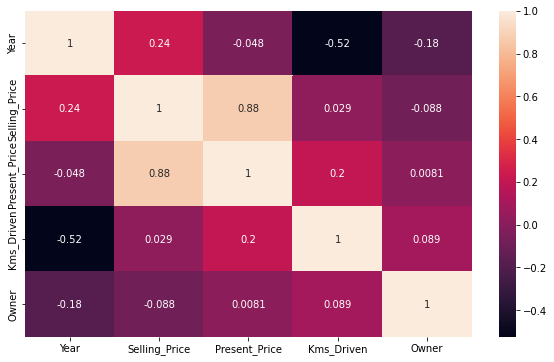

In [101]:
sns.heatmap(df.corr(),annot = True);

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [102]:
df.Fuel_Type

0      Petrol
1      Diesel
2      Petrol
3      Petrol
4      Diesel
        ...  
296    Diesel
297    Petrol
298    Petrol
299    Diesel
300    Petrol
Name: Fuel_Type, Length: 301, dtype: object

In [103]:
pd.get_dummies(df.Fuel_Type)

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [104]:
df = pd.concat([df,pd.get_dummies(df.Fuel_Type)],axis=1)


In [105]:
df.Fuel_Type

0      Petrol
1      Diesel
2      Petrol
3      Petrol
4      Diesel
        ...  
296    Diesel
297    Petrol
298    Petrol
299    Diesel
300    Petrol
Name: Fuel_Type, Length: 301, dtype: object

In [106]:
df.drop(['Fuel_Type','CNG'],axis=1,inplace=True)

In [107]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Seller_Type', 'Transmission', 'Owner', 'Diesel', 'Petrol'],
      dtype='object')

In [108]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [109]:
df.Transmission = df.Transmission.map(lambda x: 0 if x == 'Automatic' else  1)

In [110]:
df.Transmission.unique()

array([1, 0])

In [111]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [112]:
df = df.drop("Seller_Type",axis=1)

In [113]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Transmission', 'Owner', 'Diesel', 'Petrol'],
      dtype='object')

In [114]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [115]:
df.Owner.value_counts().dtype

dtype('int64')

In [116]:
df.Owner = df.Owner.map(lambda x: 0 if x == 1 or 3 else  1)

In [117]:
df.Owner.value_counts()

0    301
Name: Owner, dtype: int64

### Splitting data into training and testing

##  Model Building (Linear Regression)

# Interpret the model

# Model Evaluation

# Regularization

# Ridge

# Lasso

## Elastic-Net 